In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import spacy

In [2]:
pd.set_option('max_colwidth', 400)

In [3]:
data=pd.read_csv('/kaggle/input/symptom2disease/Symptom2Disease.csv')
data.head()

,Unnamed: 0,label,text
0,0,Psoriasis,"I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches."
1,1,Psoriasis,"My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation."
2,2,Psoriasis,"I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints."
3,3,Psoriasis,"There is a silver like dusting on my skin, especially on my lower back and scalp. This dusting is made up of small scales that flake off easily when I scratch them."
4,4,Psoriasis,"My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms."


# BaG of words

In [4]:
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words
print(f'Spacy english stopwords size: {len(stopwords)}', end='\n\n')

Spacy english stopwords size: 326



In [5]:
%%time
data['cleaned_text'] = data['text'].apply(
    lambda x: ' '.join(
        token.lemma_.lower() for token in nlp(x) if 
        not token.is_stop 
        and not token.is_punct
        and not token.is_digit
        and not token.like_email
        and not token.like_num
        and not token.is_space
    ))

CPU times: user 12.6 s, sys: 7.84 ms, total: 12.7 s
Wall time: 12.7 s


In [6]:
data.sample(5)

,Unnamed: 0,label,text,cleaned_text
377,77,Common Cold,"My eyes are always red and swollen, and I feel like there's something blocking my sinuses. I've been coughing up a lot of goo and my chest feels really heavy. I can't smell anything and my muscles are really sore",eye red swollen feel like block sinus cough lot goo chest feel heavy smell muscle sore
30,30,Psoriasis,"Because of dry, flaky areas on my skin, I am prone to infections. My joints are in excruciating agony. The skin on my knees and elbows is beginning to flake.",dry flaky area skin prone infection joint excruciating agony skin knee elbows begin flake
1031,131,gastroesophageal reflux disease,"I have indigestion and heartburn. I frequently vomit everything I eat, and it is hard for me to swallow since food gets caught in my throat. My upper abdomen is in discomfort.",indigestion heartburn frequently vomit eat hard swallow food gets catch throat upper abdomen discomfort
1169,269,diabetes,"I have a chronic dry cough. I have palpitations and my infections don't appear to be getting better. I also have a painful throat issue, although it does seem to go away.",chronic dry cough palpitation infection appear get well painful throat issue away
515,215,Arthritis,"My muscles have been feeling really weak, and my neck has been extremely tight. I have swollen joints and find it difficult to move about without becoming stiff. It has also been really uncomfortable to walk.",muscle feel weak neck extremely tight swollen joint find difficult stiff uncomfortable walk


In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

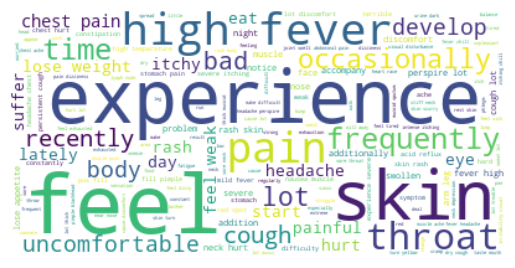

In [8]:
text = data['cleaned_text'].tolist() 
text = ' '.join(text).lower()
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True,
                      background_color='white').generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

The word cloud shows the most common words used in the symptoms description.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], random_state=42)

In [11]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [12]:
def return_bag(v,matrix):
    return pd.DataFrame(matrix.toarray(), columns=v.get_feature_names_out())

In [13]:
X_train_0 = return_bag(vectorizer,X_train_vectorized)
X_test_0 = return_bag(vectorizer,X_test_vectorized)
X_train_0.head()

,abdoman,abdomen,abdominal,ability,able,abound,absolutely,aburning,accomapanie,accompany,...,worry,worrying,worsen,wound,wrist,wrong,yeast,yellow,yellowish,yesterday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Taking the X set as example, I wanna draw a bar chart to visualize the top 20 common word with their corresponding frequencies.

In [14]:
sum_words = X_train_0.sum(axis=0).sort_values(ascending=False)
top_words = sum_words.head(20).to_dict()

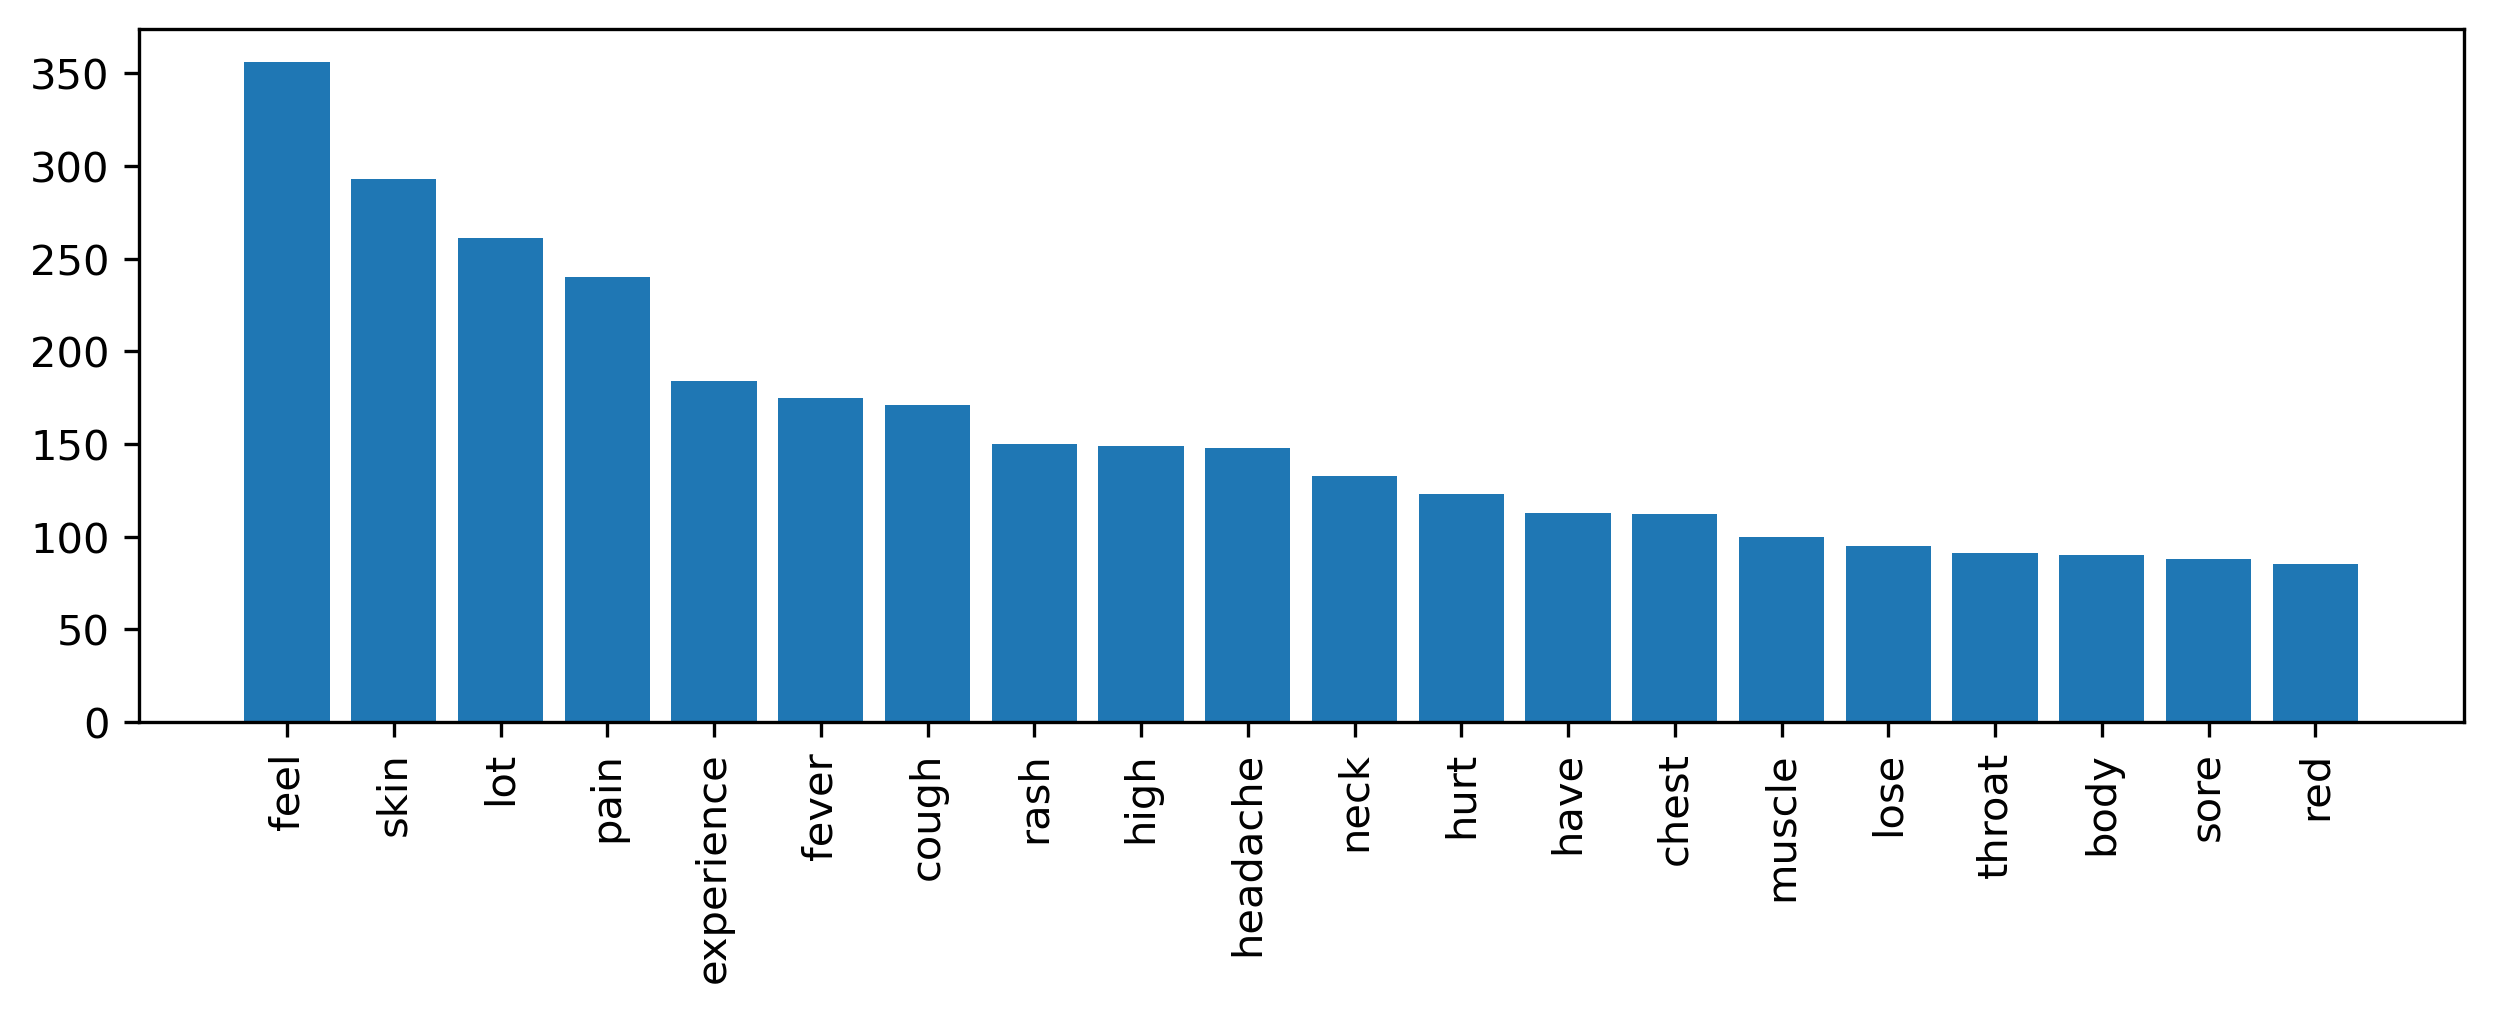

In [15]:
plt.figure(figsize=(10,3),dpi=300)
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()),rotation='vertical')
plt.show()

In [16]:
vectorizer_ = CountVectorizer(max_df=0.9, min_df=0.003)
X_train_vectorized_ = vectorizer_.fit_transform(X_train)
X_test_vectorized_ = vectorizer_.transform(X_test)

In [17]:
X_train_1 = return_bag(vectorizer_,X_train_vectorized_)
X_test_1 = return_bag(vectorizer_,X_test_vectorized_)
X_train_1.head()

,abdoman,abdomen,abdominal,ability,able,absolutely,accompany,ache,acid,acidic,...,will,woozy,work,worn,worried,worry,wound,wrong,yeast,yellow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


Next, try to compare whether there's huge difference in predicting Performance between the two results, Ads the first one has 400 columns more than the second...

# Try classification with naive bayes

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.fit_transform(y_test)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
nb = MultinomialNB()
nb.fit(np.array(X_train_0), y_train1)
predicted_categories = nb.predict(np.array(X_test_0))

In [20]:
print(classification_report(le.inverse_transform(y_test1),le.inverse_transform(predicted_categories)))

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        12
               Bronchial Asthma       0.88      1.00      0.93        14
           Cervical spondylosis       1.00      1.00      1.00        11
                    Chicken pox       0.92      0.92      0.92        12
                    Common Cold       1.00      0.93      0.97        15
                         Dengue       0.87      0.93      0.90        14
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       1.00      1.00      1.00        14
                   Hypertension       1.00      1.00      1.00        13
                       Impetigo       1.00      1.00      1.00        13
                       Jaundice       1.00      1.00      1.00        15
                        Malaria       0.93      1.

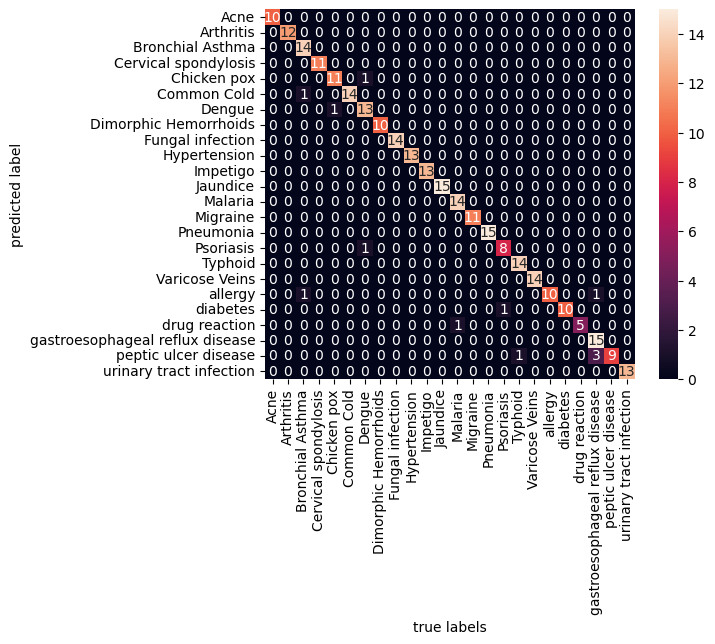

In [22]:
matrix=confusion_matrix(y_test1,predicted_categories)
tag = np.unique(y_train)
sns.heatmap(matrix, square=True, annot=True, fmt="d", xticklabels=tag, yticklabels=tag)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

# Try classification with Dense

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.metrics import classification_report

In [24]:
y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)

In [25]:
X_train = np.array(X_train_0)
X_test = np.array(X_test_0)

In [26]:
def create_model(in_dim):
    model = Sequential()
    model.add(Dense(1024,input_dim=in_dim,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(768,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(512,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(256,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(128,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(len(data['label'].unique()),activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
model = create_model(len(X_train[0]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              1101824   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 768)               787200    
                                                                 
 dropout_1 (Dropout)         (None, 768)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               393728    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               1

In [27]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),verbose=0, batch_size=64, epochs=100)
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 5ms/step - loss: 0.1616 - accuracy: 0.9567


[0.16160744428634644, 0.9566666483879089]

In [28]:
pred = model.predict(X_test)
pred_classes = [np.argmax(element) for element in pred]
print(classification_report(y_test,to_categorical(pred_classes), target_names=tag))

10/10 [==============================] - 0s 5ms/step
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        12
               Bronchial Asthma       0.93      1.00      0.97        14
           Cervical spondylosis       1.00      1.00      1.00        11
                    Chicken pox       0.79      0.92      0.85        12
                    Common Cold       0.92      0.80      0.86        15
                         Dengue       0.80      0.86      0.83        14
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       1.00      1.00      1.00        14
                   Hypertension       1.00      1.00      1.00        13
                       Impetigo       1.00      1.00      1.00        13
                       Jaundice       1.00      1.00      1.00        

In [29]:
X_train_ = np.array(X_train_0)
X_test_ = np.array(X_test_0)

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train_, y_train, validation_data=(X_test_, y_test),verbose=0, batch_size=64, epochs=50)
model.evaluate(X_test_, y_test)

10/10 [==============================] - 0s 5ms/step - loss: 0.1500 - accuracy: 0.9733


[0.14998459815979004, 0.9733333587646484]

In [31]:
pred_ = model.predict(X_test_)
pred_classes_ = [np.argmax(element) for element in pred]
print(classification_report(y_test,to_categorical(pred_classes_), target_names=tag))

10/10 [==============================] - 0s 5ms/step
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        12
               Bronchial Asthma       0.93      1.00      0.97        14
           Cervical spondylosis       1.00      1.00      1.00        11
                    Chicken pox       0.79      0.92      0.85        12
                    Common Cold       0.92      0.80      0.86        15
                         Dengue       0.80      0.86      0.83        14
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       1.00      1.00      1.00        14
                   Hypertension       1.00      1.00      1.00        13
                       Impetigo       1.00      1.00      1.00        13
                       Jaundice       1.00      1.00      1.00        

Actually, there is no huge difference on the test set. But since this is for symptom diagnose so the full set might be the best option.

# Tf-Idf

In [33]:
! pip install scikeras

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer,  TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from scikeras.wrappers import KerasClassifier

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], random_state=42)
le = preprocessing.LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.fit_transform(y_test)
y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)

### TfidfVectorizer

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


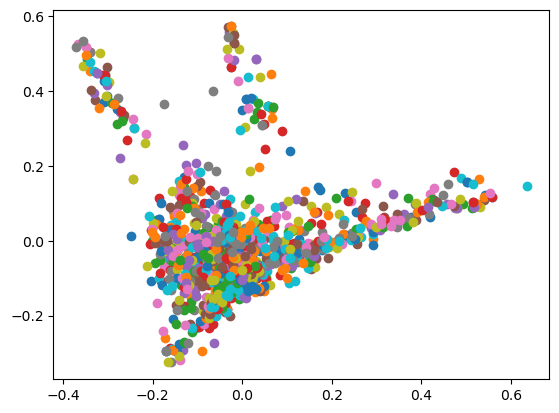

In [36]:
from sklearn.decomposition import PCA
vectorizer=TfidfVectorizer(min_df=1, stop_words='english', decode_error='ignore')
vectorized=vectorizer.fit_transform(data['cleaned_text'])
num_samples, num_features=vectorized.shape
reduced_data = PCA(n_components=2).fit_transform(vectorized.todense())
fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    pca_comp_1, pca_comp_2 = reduced_data[index]
    ax.scatter(pca_comp_1, pca_comp_2)
plt.show()

In [37]:
vectorized.shape

(1200, 1144)

In [39]:
clf = KerasClassifier(model=create_model(1075), epochs=50, verbose=0)
pipetf = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer()),
        ('clf', clf)
    ]
).fit(X_train, y_train)
predtf = pipetf.predict(X_test)
print(classification_report(y_test, predtf, target_names=tag))

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        12
               Bronchial Asthma       1.00      1.00      1.00        14
           Cervical spondylosis       1.00      1.00      1.00        11
                    Chicken pox       0.77      0.83      0.80        12
                    Common Cold       1.00      0.93      0.97        15
                         Dengue       0.71      0.71      0.71        14
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       1.00      1.00      1.00        14
                   Hypertension       1.00      1.00      1.00        13
                       Impetigo       1.00      1.00      1.00        13
                       Jaundice       1.00      1.00      1.00        15
                        Malaria       1.00      1.

### IDF

In [40]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_train)
print(len(vectorizer.get_feature_names()))

1075


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(X)
df_idf = pd.DataFrame(tfidf_transformer.idf_, columns=["idf_weights"]) 
df_idf = df_idf.sort_values(by=['idf_weights'],ascending=False)
df_idf.head(10)

,idf_weights
732,7.110358
272,7.110358
265,7.110358
670,7.110358
678,7.110358
262,7.110358
261,7.110358
259,7.110358
257,7.110358
256,7.110358


In [42]:
count_vector=vectorizer.transform(X_train) 
tf_idf_vector=tfidf_transformer.transform(count_vector)
text_vector=tf_idf_vector[0]
df_score = pd.DataFrame(text_vector.T.todense(), columns=["tfidf"]) 
df_score = df_score.sort_values(by=["tfidf"],ascending=False)
df_score.head(10)

,tfidf
326,0.372991
224,0.320396
1017,0.293647
1072,0.287076
1051,0.282513
616,0.270335
881,0.262105
519,0.261003
809,0.243585
559,0.235462


In [43]:
clf = KerasClassifier(model=create_model(1075), epochs=50, verbose=0)
pipett = Pipeline(
    steps=[
        ('counter', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
       ('clf',  clf)]
).fit(X_train, y_train)
predtt = pipett.predict(X_test)
print(classification_report(y_test, predtt, target_names=tag))

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        12
               Bronchial Asthma       0.88      1.00      0.93        14
           Cervical spondylosis       1.00      1.00      1.00        11
                    Chicken pox       0.79      0.92      0.85        12
                    Common Cold       0.93      0.87      0.90        15
                         Dengue       0.87      0.93      0.90        14
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       1.00      1.00      1.00        14
                   Hypertension       1.00      1.00      1.00        13
                       Impetigo       1.00      0.92      0.96        13
                       Jaundice       1.00      1.00      1.00        15
                        Malaria       1.00      1.

Conclusion: It is possible to deduce the actual diseases from the symptom description. Strangely, there is no improvement from Naive Bayes to deep neural networks (possibly because I did not use CNN and RNN).